In [44]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt
import seaborn

In [45]:
data = pd.read_csv('data/daily_close.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index).date

In [46]:
train_data = data.iloc[:int(len(data)*1)]
test_data = data.iloc[int(len(data)*0.7):]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1400, 50)
Testing data shape: (421, 50)


In [47]:
def find_cointegrated_pairs(data, threshold = 0.05):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < threshold:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('ADANIENT', 'NESTLEIND'), ('ADANIENT', 'TATAMOTORS'), ('ADANIPORTS', 'BPCL'), ('ADANIPORTS', 'COALINDIA'), ('APOLLOHOSP', 'SUNPHARMA'), ('AXISBANK', 'BRITANNIA'), ('BAJAJ-AUTO', 'BPCL'), ('BAJAJ-AUTO', 'CIPLA'), ('BAJFINANCE', 'KOTAKBANK'), ('BAJAJFINSV', 'KOTAKBANK'), ('BPCL', 'CIPLA'), ('BPCL', 'HINDALCO'), ('BPCL', 'ONGC'), ('BHARTIARTL', 'EICHERMOT'), ('BHARTIARTL', 'ICICIBANK'), ('BHARTIARTL', 'JSWSTEEL'), ('BRITANNIA', 'SBILIFE'), ('CIPLA', 'GRASIM'), ('CIPLA', 'NTPC'), ('CIPLA', 'POWERGRID'), ('CIPLA', 'SHRIRAMFIN'), ('COALINDIA', 'DRREDDY'), ('COALINDIA', 'HEROMOTOCO'), ('COALINDIA', 'ONGC'), ('COALINDIA', 'RELIANCE'), ('DRREDDY', 'ONGC'), ('DRREDDY', 'TCS'), ('EICHERMOT', 'JSWSTEEL'), ('HDFCBANK', 'INDUSINDBK'), ('ICICIBANK', 'JSWSTEEL'), ('JSWSTEEL', 'M&M'), ('JSWSTEEL', 'SHRIRAMFIN'), ('LT', 'M&M'), ('LT', 'NTPC'), ('LT', 'ONGC'), ('LT', 'POWERGRID'), ('LT', 'RELIANCE'), ('LT', 'SBIN'), ('LT', 'SUNPHARMA'), ('LT', 'TCS'), ('LT', 'TATACONSUM'), ('LT', 'TATAMOTORS'), ('LT', 

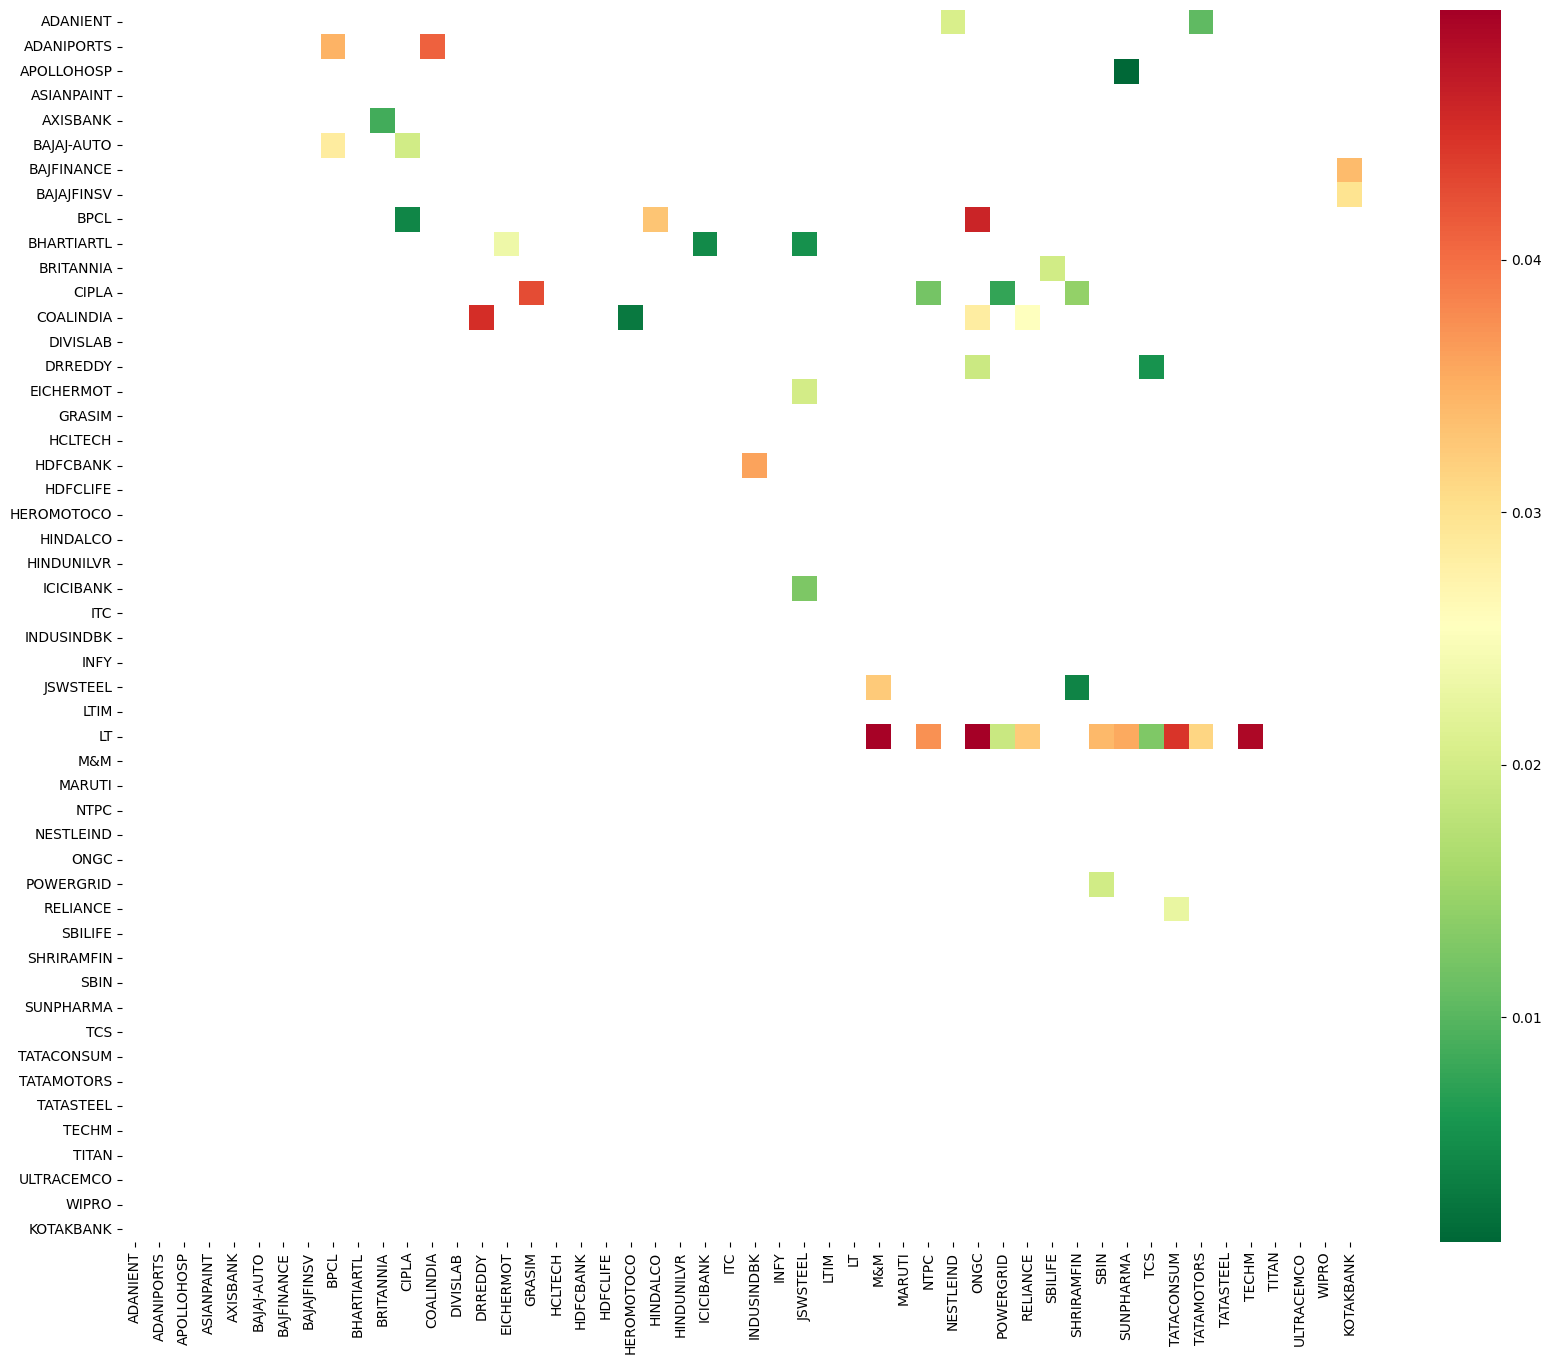

In [48]:
scores, pvalues, pairs = find_cointegrated_pairs(test_data, 0.05)
plt.figure(figsize=(20, 16))
seaborn.heatmap(pvalues, xticklabels=test_data.columns, yticklabels=test_data.columns, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [49]:
pairs_df = pd.DataFrame(pairs, columns=['stock1', 'stock2'])
pairs_df['p_value'] = [pvalues[test_data.columns.get_loc(pair[0]), test_data.columns.get_loc(pair[1])] for pair in pairs]
pairs_df = pairs_df.sort_values('p_value')

In [50]:
pairs_df.to_csv('data/p_values.csv')

In [51]:
pairs_df

,stock1,stock2,p_value
4,APOLLOHOSP,SUNPHARMA,0.001109
22,COALINDIA,HEROMOTOCO,0.002846
31,JSWSTEEL,SHRIRAMFIN,0.004147
10,BPCL,CIPLA,0.004281
14,BHARTIARTL,ICICIBANK,0.004595
15,BHARTIARTL,JSWSTEEL,0.005460
26,DRREDDY,TCS,0.005630
19,CIPLA,POWERGRID,0.007757
5,AXISBANK,BRITANNIA,0.008646
1,ADANIENT,TATAMOTORS,0.010556


winner APOLLOHOSP–SUNPHARMA

In [52]:
S1 = test_data['APOLLOHOSP']
S2 = test_data['SUNPHARMA']

In [53]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.0011092911523809723

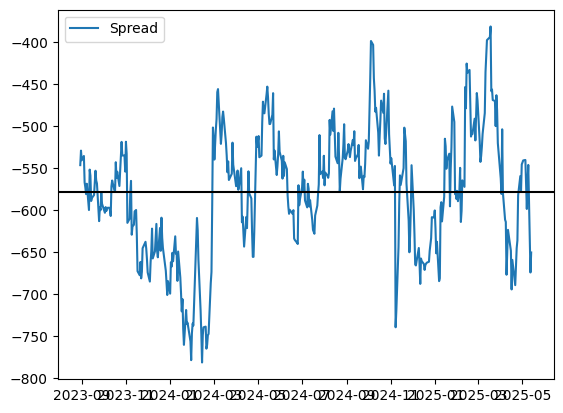

In [54]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['APOLLOHOSP']
b = results.params['APOLLOHOSP']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

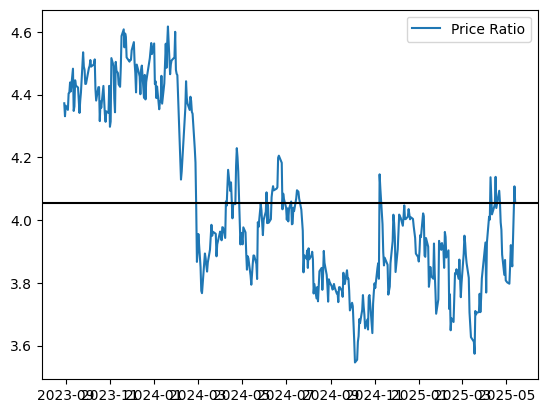

In [55]:
ratio = S1/S2
ratio.plot()
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

In [56]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

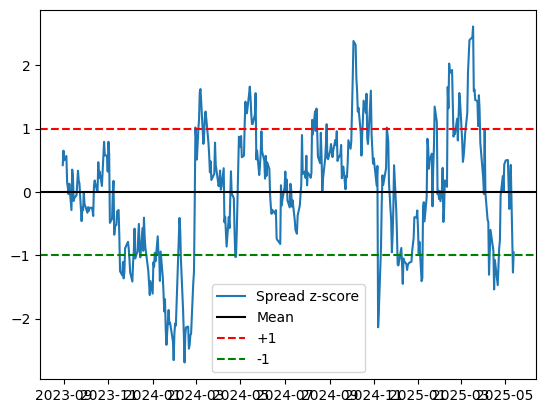

In [57]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

<Axes: >

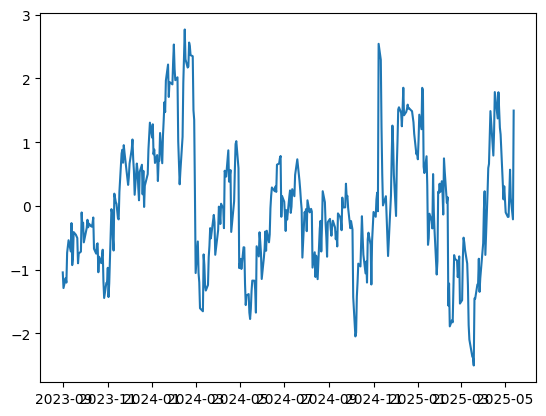

In [73]:
X = sm.add_constant(S2)
model = sm.OLS(S1, X).fit()
beta = model.params[1]
alpha = model.params[0]

residuals = S1 - (alpha + beta * S2)

delta_y = S1.diff()
delta_x = S2.diff()
lagged_residual = residuals.shift(1)

ecm_data = pd.DataFrame({
    'delta_y': delta_y,
    'delta_x': delta_x,
    'lagged_residual': lagged_residual
}).dropna()


ecm_model = sm.OLS(ecm_data['delta_y'], sm.add_constant(ecm_data[['lagged_residual', 'delta_x']])).fit()
gamma = ecm_model.params['lagged_residual']

z_score = (lagged_residual - lagged_residual.mean()) / lagged_residual.std()
z_score.plot()

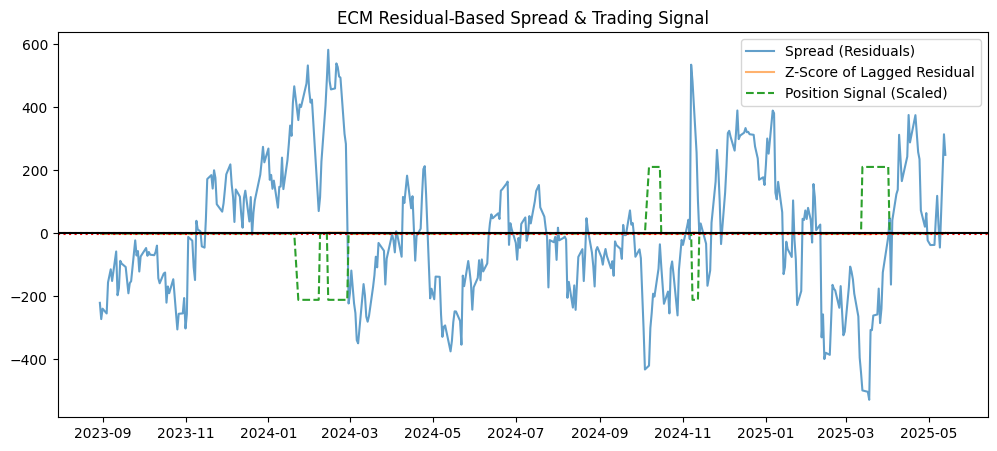

In [75]:
entry_threshold = 2
exit_threshold = 0.5

signal = pd.Series(index=z_score.index, dtype=int)
signal[z_score > entry_threshold] = -1  # spread too high → short S1, long S2
signal[z_score < -entry_threshold] = 1  # spread too low → long S1, short S2
signal[abs(z_score) < exit_threshold] = 0  # close positions

signal = signal.ffill().fillna(0)
plt.figure(figsize=(12, 5))
plt.plot(residuals.index, residuals, label='Spread (Residuals)', alpha=0.7)
plt.plot(z_score.index, z_score, label='Z-Score of Lagged Residual', alpha=0.6)
plt.plot(signal.index, signal * residuals.std(), label='Position Signal (Scaled)', linestyle='--')
plt.axhline(entry_threshold, color='r', linestyle=':')
plt.axhline(-entry_threshold, color='r', linestyle=':')
plt.axhline(0, color='black', linestyle='-')
plt.legend()
plt.title("ECM Residual-Based Spread & Trading Signal")
plt.show()


In [78]:
# Calculate total profit
total_profit = pnl.sum()
print(f"Total Profit: {total_profit:.2f}")

# Calculate annualized return
days = (pnl.index[-1] - pnl.index[0]).days
annualized_return = (1 + total_profit) ** (365/days) - 1
print(f"Annualized Return: {annualized_return:.2%}")

# Calculate Sharpe Ratio
daily_returns = pnl[pnl != 0]
sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Total Profit: 0.55
Annualized Return: 29.23%
Sharpe Ratio: 6.30


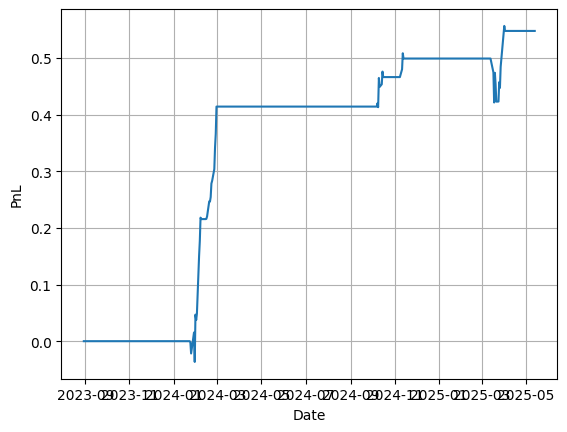

In [77]:
# Assumes:
# - signal is already aligned and contains previous day's signal
# - S1 and S2 are price series
# - beta is the hedge ratio from earlier OLS

# Shift signal to avoid lookahead bias
signal_shifted = signal.shift(1)

# Compute daily returns
ret_s1 = S1.pct_change()
ret_s2 = S2.pct_change()

# Daily PnL from pair position
pnl = signal_shifted * (ret_s1 - beta * ret_s2)
pnl = pnl.fillna(0)

# Cumulative returns
cumulative_pnl = pnl.cumsum()

# Plot
import matplotlib.pyplot as plt
plt.plot(cumulative_pnl)
plt.ylabel("PnL")
plt.xlabel("Date")
plt.grid()
plt.show()


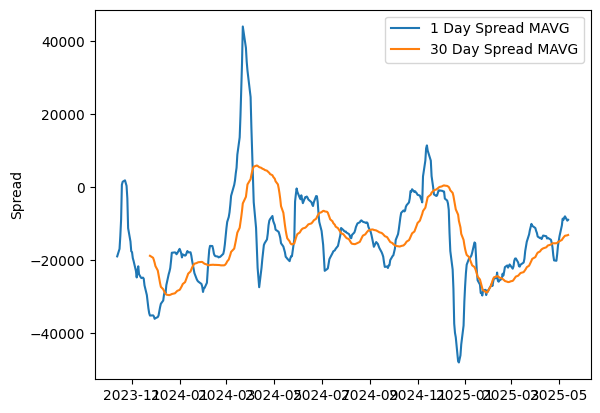

In [72]:
# Get the spread between the 2 stocks
# Calculate rolling beta coefficient using statsmodels
window = 30
rolling_beta = pd.Series(index=S1.index)
for i in range(window, len(S1)):
    y = S1[i-window:i]
    x = S2[i-window:i]
    model = sm.OLS(y, sm.add_constant(x)).fit()
    rolling_beta.iloc[i] = model.params[1]

spread = S2 - rolling_beta * S1
spread.name = 'spread'

# Get the 1 day moving average of the price spread
spread_mavg1 = spread.rolling(window=1).mean()
spread_mavg1.name = 'spread 1d mavg'

# Get the 30 day moving average
spread_mavg30 = spread.rolling(window=30).mean()
spread_mavg30.name = 'spread 30d mavg'

plt.plot(spread_mavg1.index, spread_mavg1.values)
plt.plot(spread_mavg30.index, spread_mavg30.values)

plt.legend(['1 Day Spread MAVG', '30 Day Spread MAVG'])

plt.ylabel('Spread');

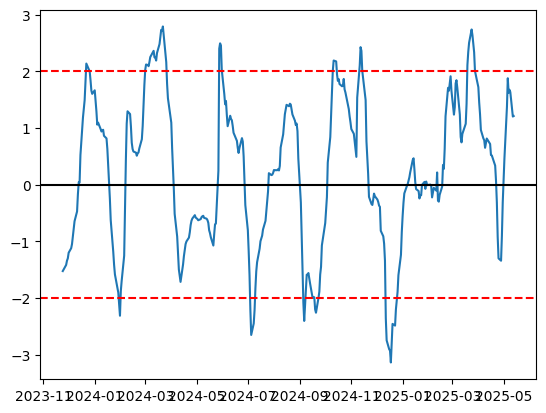

In [70]:
# Take a rolling 30 day standard deviation
std_30 = spread.rolling(window=30).std()
std_30.name = 'std 30d'

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30
zscore_30_1.name = 'z-score'
zscore_30_1.plot()
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='red', linestyle='--')

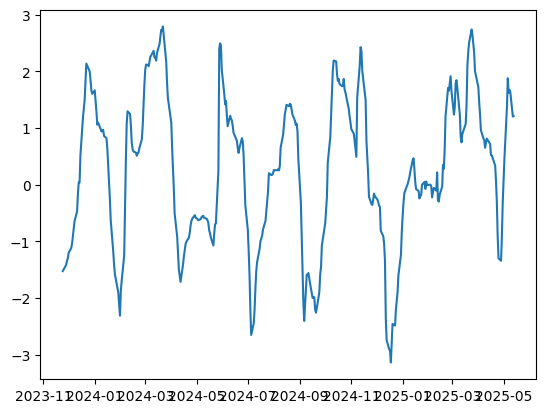

In [71]:
# Plot the prices scaled down along with the negative z-score
# just divide the stock prices by 10 to make viewing it on the plot easier
#plt.plot(S1.index, S1.values/4000)
#plt.plot(S2.index, S2.values/1000)
plt.plot(zscore_30_1.index, zscore_30_1.values)


COALINDIA – ONGC